In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("for_EDA_before_encoding.csv")
df.head()

,Unnamed: 0,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,DeviceName,RegistryKey,...,State,City,hour,day,weekday,month,year,is_weekend,is_business_hours,time_period
0,7327552,298,Malware,FalsePositive,Url,Related,98799,138268,153085,1631,...,1445,10630,18,10,0,6,2024,0,0,afternoon
1,7768450,1084,SuspiciousActivity,BenignPositive,Machine,Impacted,98799,138268,8616,1631,...,1445,10630,23,14,4,6,2024,0,0,evening
2,2559045,11,InitialAccess,TruePositive,MailMessage,Related,98799,138268,153085,1631,...,1445,10630,4,16,6,6,2024,1,0,night
3,4956177,23,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,153085,1631,...,1445,10630,10,16,6,6,2024,1,0,morning
4,8837109,0,InitialAccess,TruePositive,CloudLogonSession,Related,98799,138268,153085,1631,...,1445,10630,21,9,6,6,2024,1,0,evening


In [8]:
print(df.head())

   AlertTitle            Category   IncidentGrade         EntityType  \
0         298             Malware   FalsePositive                Url   
1        1084  SuspiciousActivity  BenignPositive            Machine   
2          11       InitialAccess    TruePositive        MailMessage   
3          23       InitialAccess  BenignPositive            Mailbox   
4           0       InitialAccess    TruePositive  CloudLogonSession   

  EvidenceRole  DeviceId  Sha256  DeviceName  RegistryKey  RegistryValueName  \
0      Related     98799  138268      153085         1631                635   
1     Impacted     98799  138268        8616         1631                635   
2      Related     98799  138268      153085         1631                635   
3     Impacted     98799  138268      153085         1631                635   
4      Related     98799  138268      153085         1631                635   

   ...  State   City  hour  day  weekday  month  year  is_weekend  \
0  ...   1445  10

In [6]:
df.drop(columns="Unnamed: 0", inplace = True)

## Exploratory Data Analysis:

## 1.Descriptive Analysis:

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497324 entries, 0 to 497323
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   AlertTitle          497324 non-null  int64 
 1   Category            497324 non-null  object
 2   IncidentGrade       497324 non-null  object
 3   EntityType          497324 non-null  object
 4   EvidenceRole        497324 non-null  object
 5   DeviceId            497324 non-null  int64 
 6   Sha256              497324 non-null  int64 
 7   DeviceName          497324 non-null  int64 
 8   RegistryKey         497324 non-null  int64 
 9   RegistryValueName   497324 non-null  int64 
 10  RegistryValueData   497324 non-null  int64 
 11  ApplicationName     497324 non-null  int64 
 12  OAuthApplicationId  497324 non-null  int64 
 13  FileName            497324 non-null  int64 
 14  FolderPath          497324 non-null  int64 
 15  ResourceIdName      497324 non-null  int64 
 16  OS

In [44]:
df.describe()

,AlertTitle,DeviceId,Sha256,DeviceName,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,...,CountryCode,State,City,hour,day,weekday,month,year,is_weekend,is_business_hours
count,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,...,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000,497324.000000
mean,2756.001335,95666.299929,128705.467349,143150.131536,1628.092915,634.704346,859.527572,3343.357491,880.797569,262300.790442,...,223.734407,1351.734809,9938.062167,12.159974,9.800446,2.494110,5.909182,2023.999980,0.169929,0.309637
std,10834.479206,16331.061627,34009.940102,36193.796785,67.655092,13.269422,19.536402,508.495560,12.844059,81468.032937,...,62.692870,350.524620,2603.389159,6.786394,6.175330,1.864812,0.291001,0.004484,0.375571,0.462344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2023.000000,0.000000,0.000000
25%,2.000000,98799.000000,138268.000000,153085.000000,1631.000000,635.000000,860.000000,3421.000000,881.000000,289573.000000,...,242.000000,1445.000000,10630.000000,6.000000,5.000000,1.000000,6.000000,2024.000000,0.000000,0.000000
50%,11.000000,98799.000000,138268.000000,153085.000000,1631.000000,635.000000,860.000000,3421.000000,881.000000,289573.000000,...,242.000000,1445.000000,10630.000000,13.000000,9.000000,2.000000,6.000000,2024.000000,0.000000,0.000000
75%,175.000000,98799.000000,138268.000000,153085.000000,1631.000000,635.000000,860.000000,3421.000000,881.000000,289573.000000,...,242.000000,1445.000000,10630.000000,18.000000,12.000000,4.000000,6.000000,2024.000000,0.000000,1.000000
max,113138.000000,98799.000000,138268.000000,153085.000000,1631.000000,635.000000,860.000000,3421.000000,881.000000,289573.000000,...,242.000000,1445.000000,10630.000000,23.000000,31.000000,6.000000,12.000000,2024.000000,1.000000,1.000000


In [46]:
df.shape

(497324, 31)

## 2. Visual Analysis:

### Target Variable Analysis (IncidentGrade):

<ipython-input-35-635b0ae0cada>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incident_counts.index, y=incident_counts.values, palette='viridis')


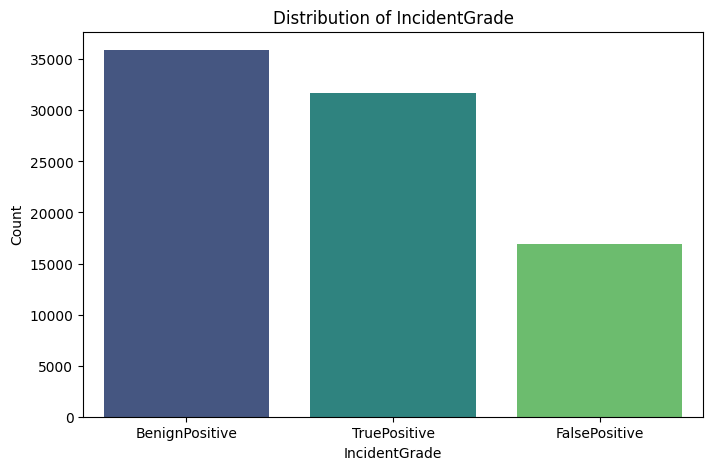

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of 'IncidentGrade' values
incident_counts = df['IncidentGrade'].value_counts()

# 1. Bar Chart for 'IncidentGrade' Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=incident_counts.index, y=incident_counts.values, palette='viridis')
plt.title('Distribution of IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

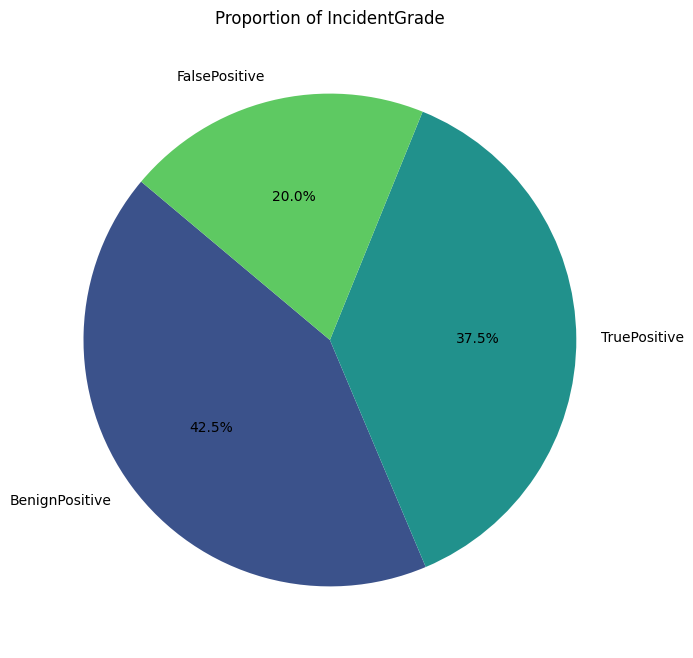

In [36]:
# 2. Pie Chart for 'IncidentGrade' Proportion
plt.figure(figsize=(8, 8))
plt.pie(incident_counts, labels=incident_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(incident_counts)))
plt.title('Proportion of IncidentGrade')
plt.show()

In [37]:
# 3. Check for Class Imbalance
total_counts = len(df)
class_distribution = incident_counts / total_counts

# Print class imbalance information
print("Class distribution as a percentage:")
print(class_distribution)

Class distribution as a percentage:
IncidentGrade
BenignPositive    0.424697
TruePositive      0.375019
FalsePositive     0.200284
Name: count, dtype: float64


<ipython-input-38-16c0f4cc007c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


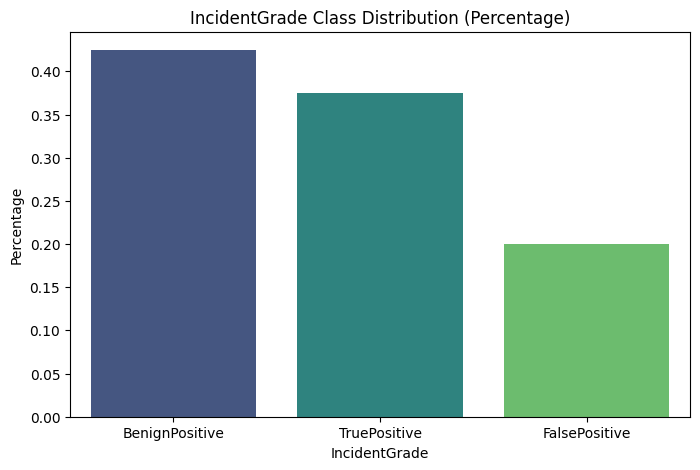

In [38]:
# visualization to highlight imbalance if needed
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('IncidentGrade Class Distribution (Percentage)')
plt.xlabel('IncidentGrade')
plt.ylabel('Percentage')
plt.show()

### Incident Grade vs time:

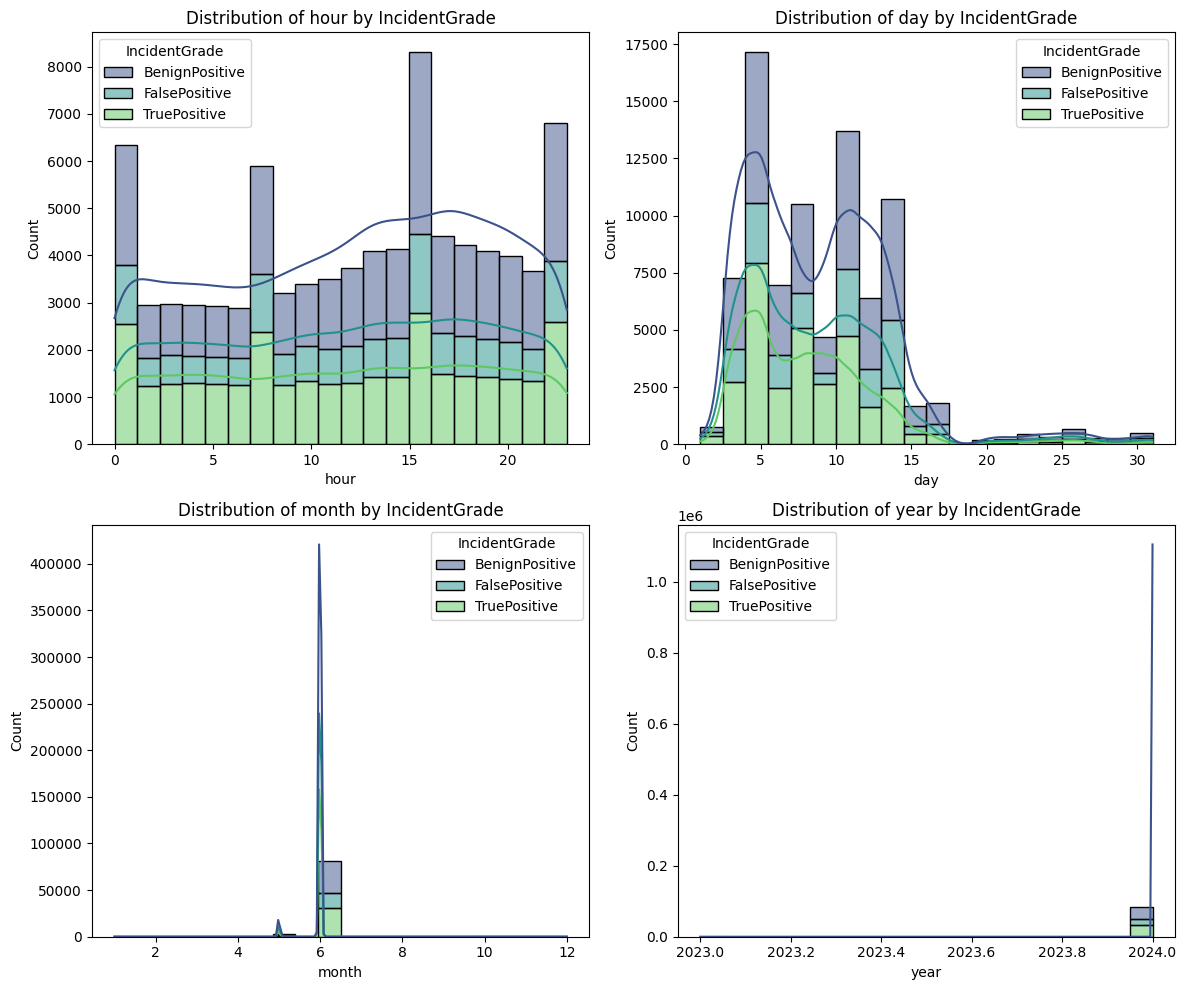

In [43]:
# Numerical Columns with 'IncidentGrade' as hue
numerical_columns = ['hour', 'day', 'month', 'year']
plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, kde=True, bins=20, hue="IncidentGrade", palette="viridis", multiple="stack")
    plt.title(f'Distribution of {column} by IncidentGrade')
plt.tight_layout()
plt.show()


In [44]:
df.head()

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,DeviceName,RegistryKey,RegistryValueName,...,State,City,hour,day,weekday,month,year,is_weekend,is_business_hours,time_period
8036545,8,InitialAccess,BenignPositive,MailMessage,Related,98799,138268,153085,1631,635,...,1445,10630,18,11,1,6,2024,0,0,afternoon
3828916,1,InitialAccess,BenignPositive,MailMessage,Related,98799,138268,153085,1631,635,...,1445,10630,8,9,6,6,2024,1,0,morning
4404679,14,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,153085,1631,635,...,1445,10630,13,13,3,6,2024,0,1,afternoon
8854100,1871,Exfiltration,FalsePositive,MailMessage,Impacted,98799,138268,153085,1631,635,...,1445,10630,7,6,3,6,2024,0,0,morning
7977240,3,InitialAccess,TruePositive,User,Impacted,98799,138268,153085,1631,635,...,1445,10630,4,9,6,6,2024,1,0,night


<ipython-input-47-b0a34e77fe75>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_data = df.groupby([column, 'IncidentGrade']).size().unstack()


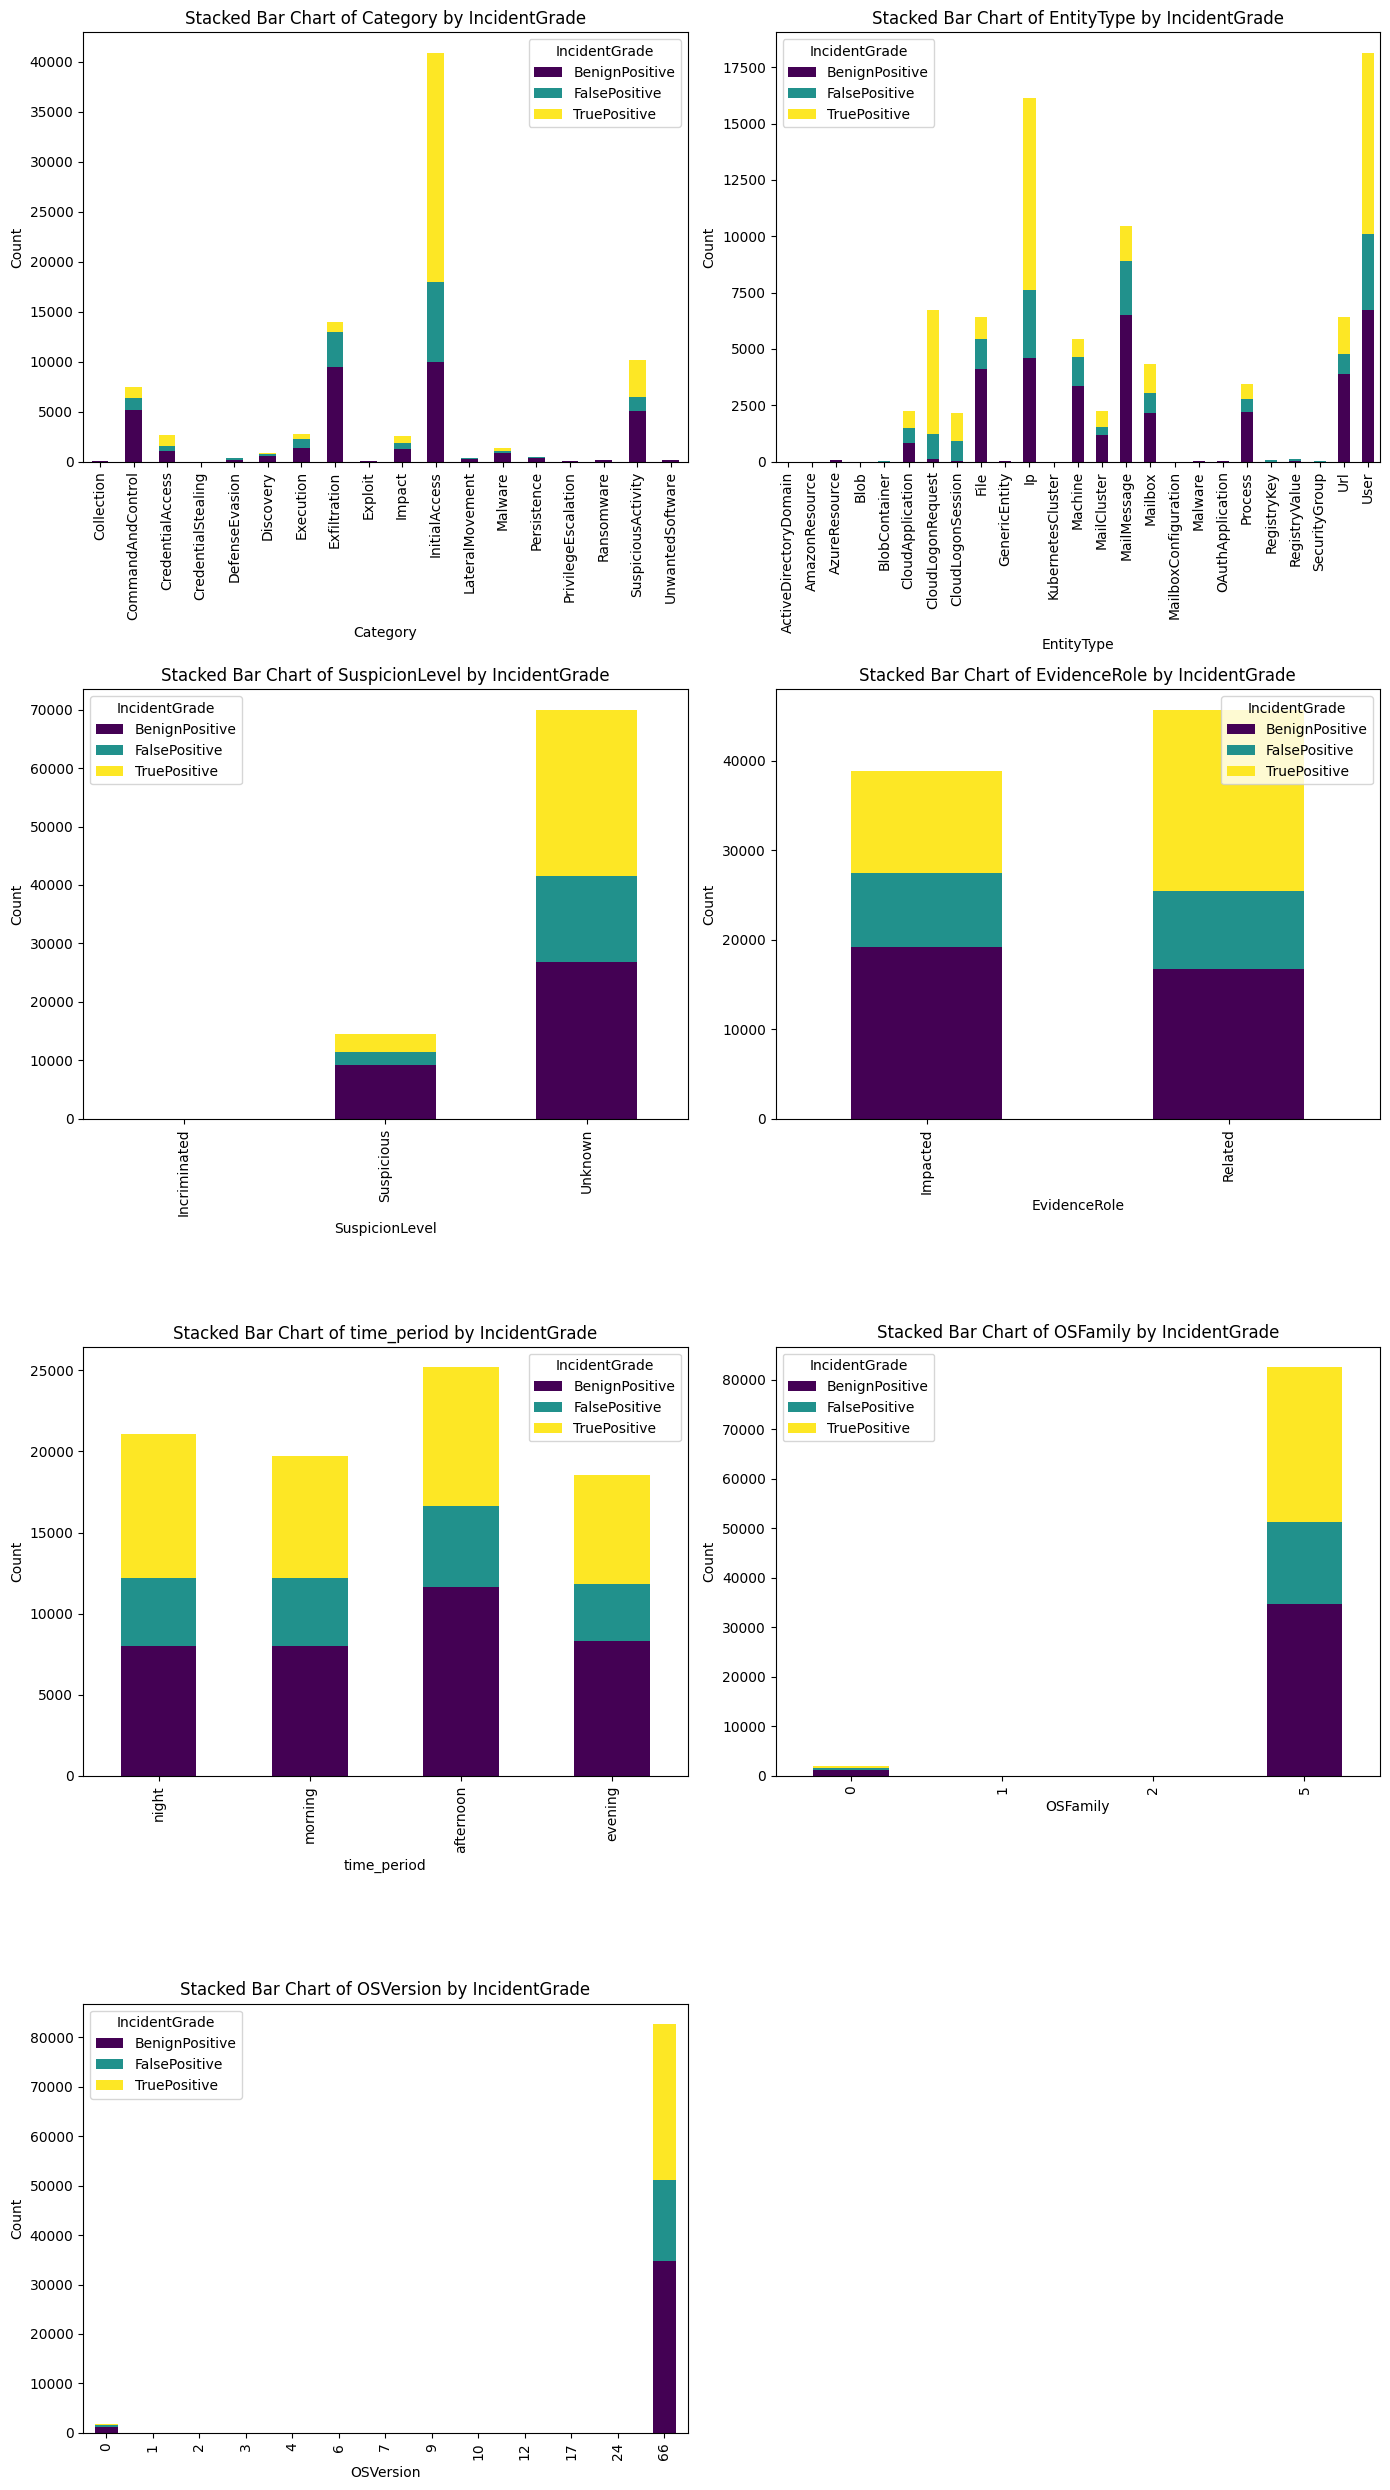

In [47]:
categorical_columns = ['Category', 'EntityType', 'SuspicionLevel', 'EvidenceRole', 'time_period', 'OSFamily', 'OSVersion' ]

# Plot Stacked Bar Chart for each categorical column
plt.figure(figsize=(14, 25))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    # Calculate the distribution of IncidentGrade within each category
    stacked_data = df.groupby([column, 'IncidentGrade']).size().unstack()
    stacked_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
    plt.title(f'Stacked Bar Chart of {column} by IncidentGrade')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='IncidentGrade')

plt.tight_layout()
plt.show()


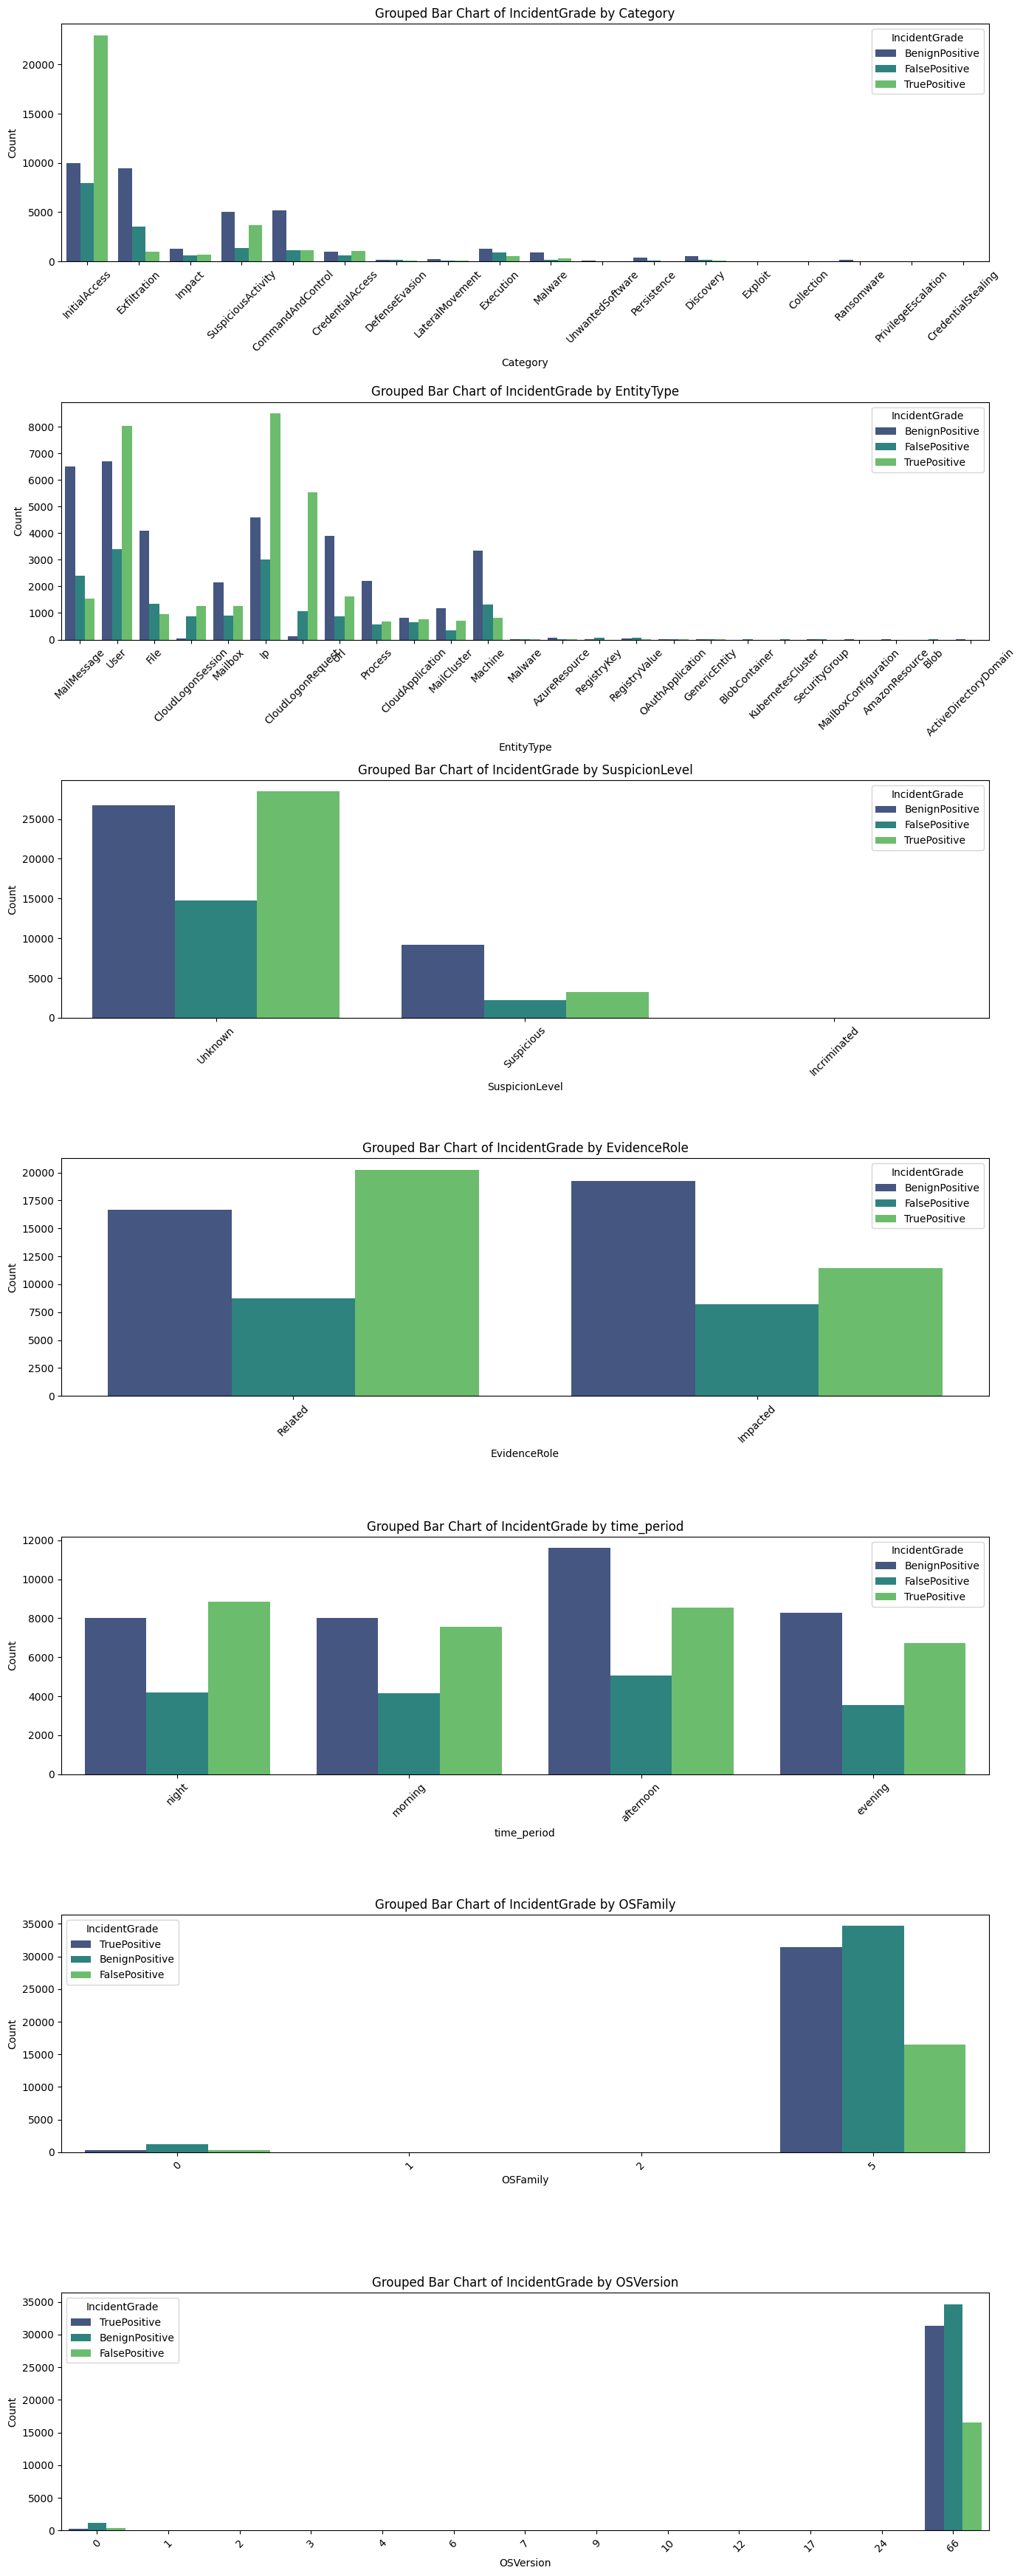

In [50]:
grouped_columns = ['Category', 'EntityType', 'SuspicionLevel', 'EvidenceRole', 'time_period', 'OSFamily', 'OSVersion']

plt.figure(figsize=(14, 35))

for i, column in enumerate(grouped_columns, 1):
    plt.subplot(7, 1, i)
    sns.countplot(data=df, x=column, hue='IncidentGrade', palette="viridis")
    plt.title(f'Grouped Bar Chart of IncidentGrade by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


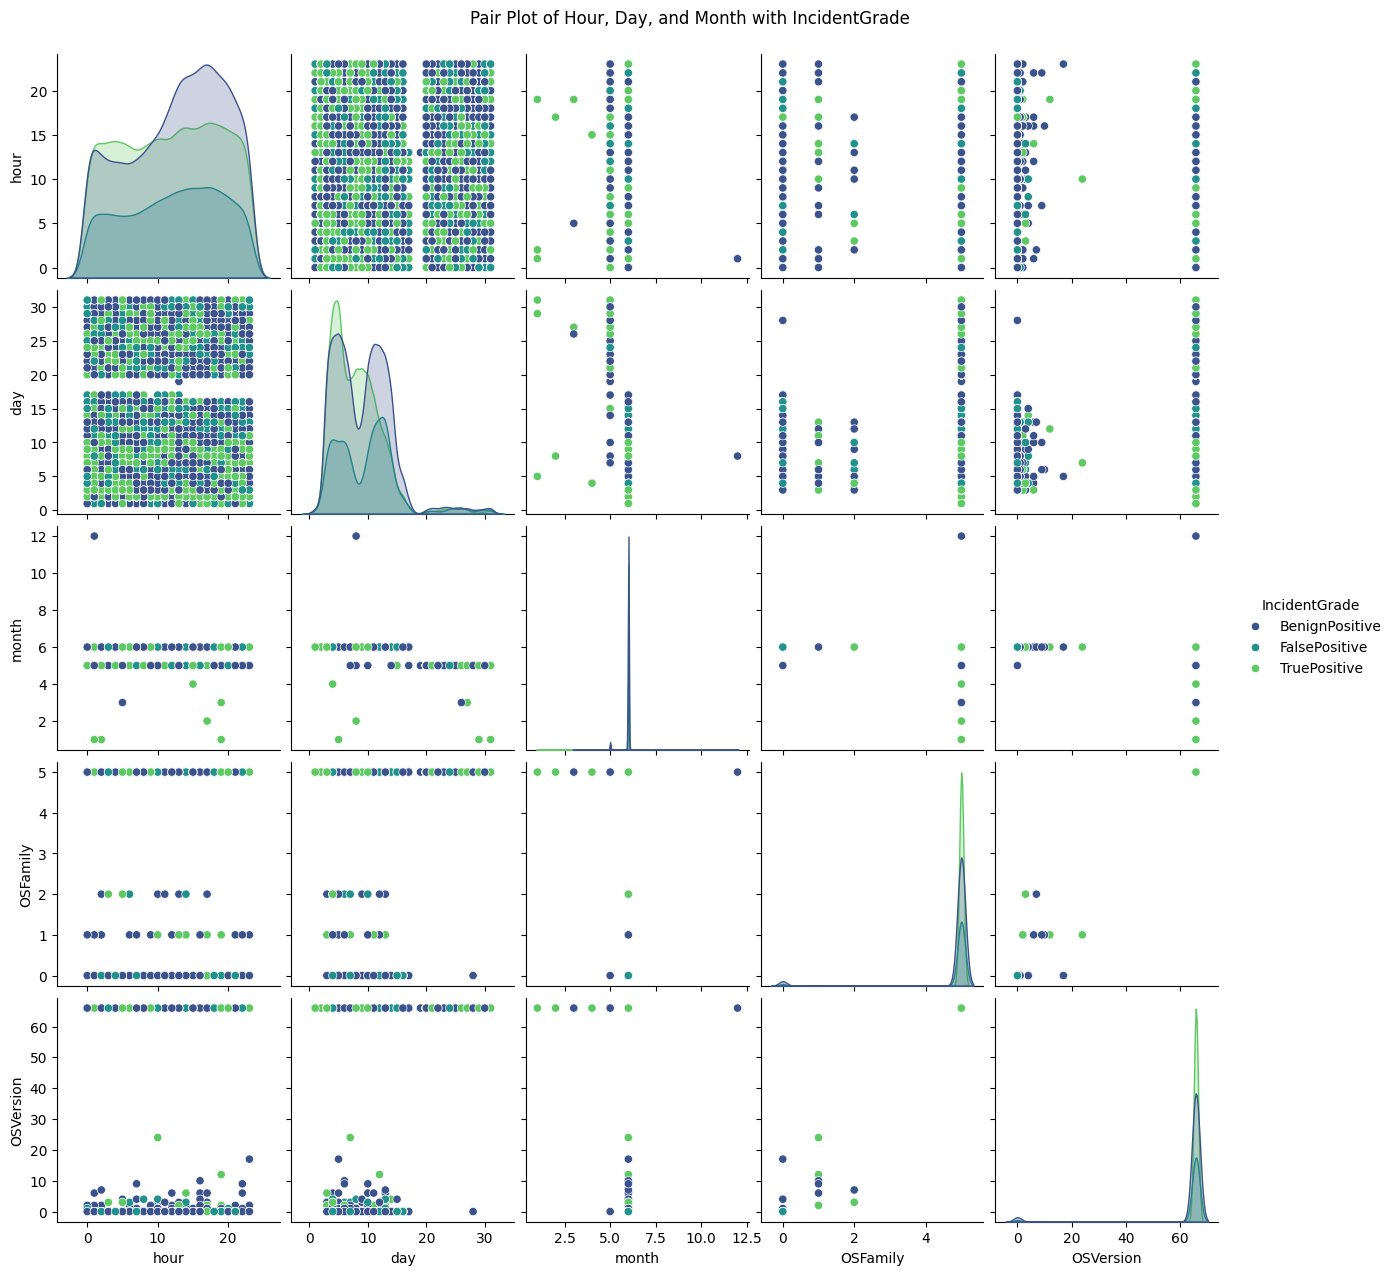

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the columns of interest
pairplot_columns = ['hour', 'day', 'month', 'IncidentGrade','Category', 'EntityType', 'SuspicionLevel', 'EvidenceRole', 'time_period', 'OSFamily', 'OSVersion']
sns.pairplot(df[pairplot_columns], hue='IncidentGrade', palette='viridis', diag_kind='kde')

plt.suptitle("Pair Plot of Hour, Day, and Month with IncidentGrade", y=1.02)
plt.show()


### Category Wise Analysis:

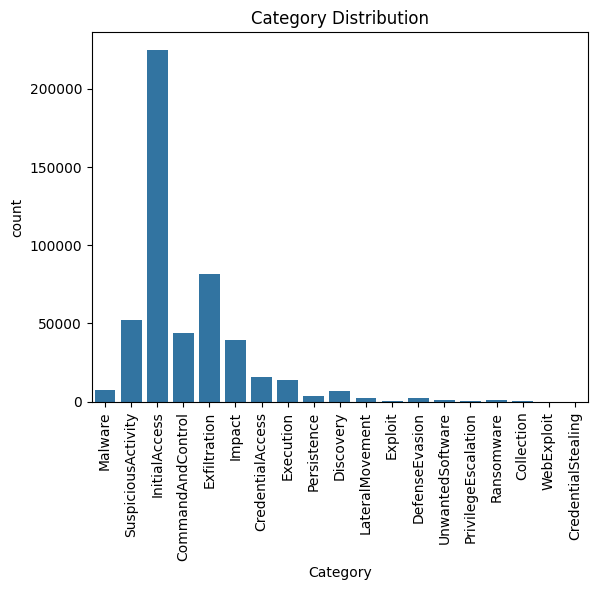

In [19]:
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

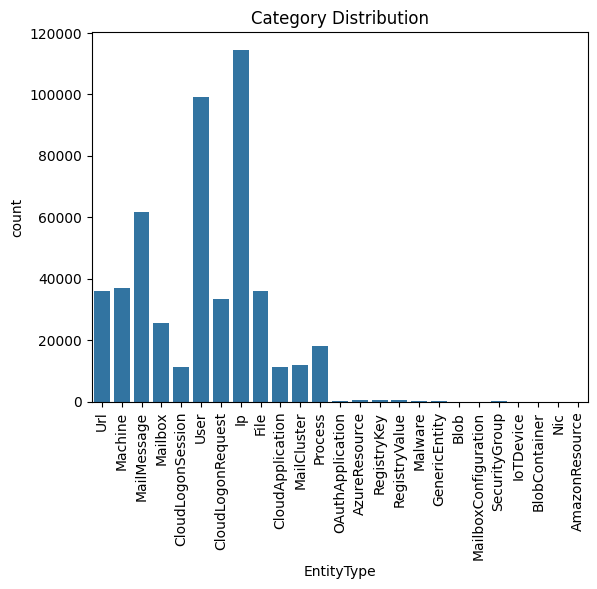

In [20]:
sns.countplot(data=df, x='EntityType')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

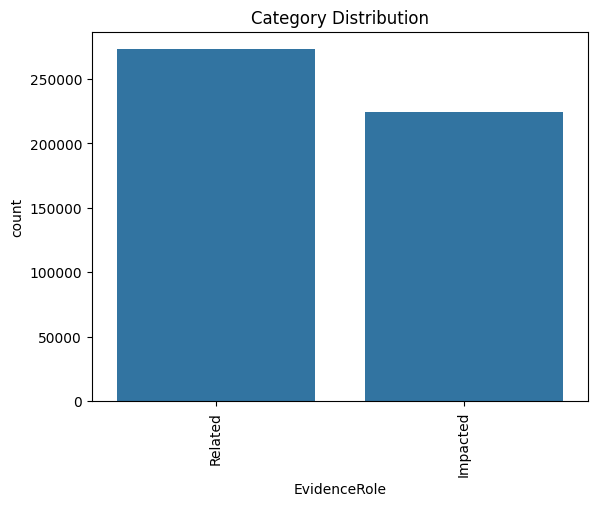

In [21]:
sns.countplot(data=df, x='EvidenceRole')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

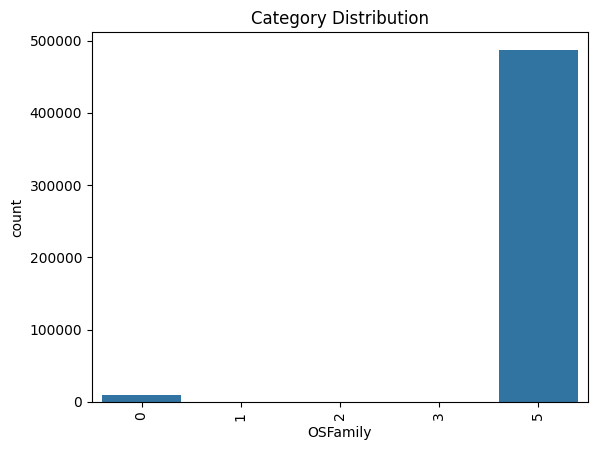

In [22]:
sns.countplot(data=df, x='OSFamily')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

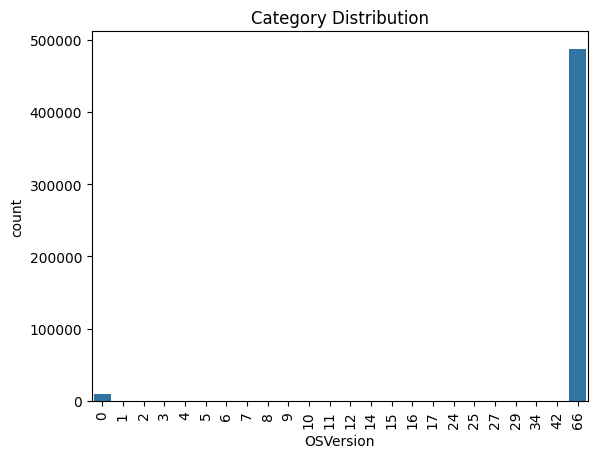

In [23]:
sns.countplot(data=df, x='OSVersion')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

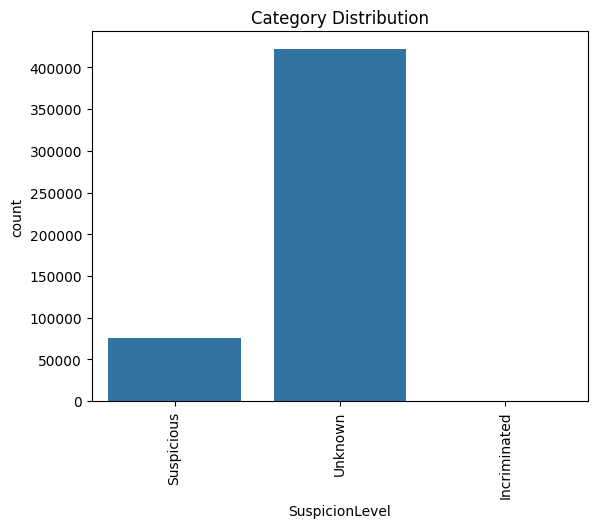

In [24]:
sns.countplot(data=df, x='SuspicionLevel')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

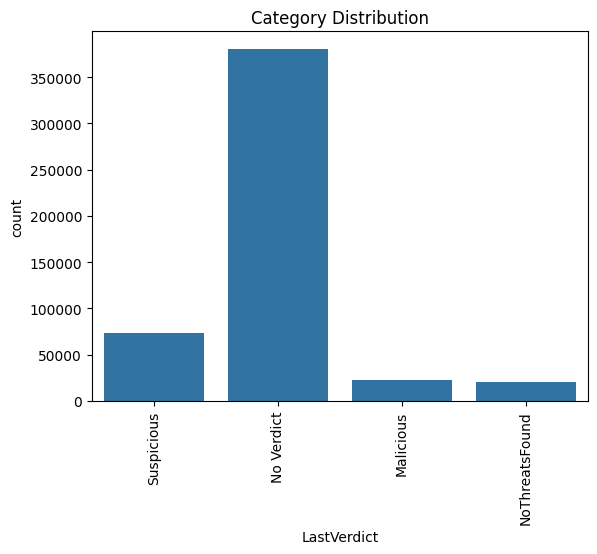

In [25]:
sns.countplot(data=df, x='LastVerdict')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

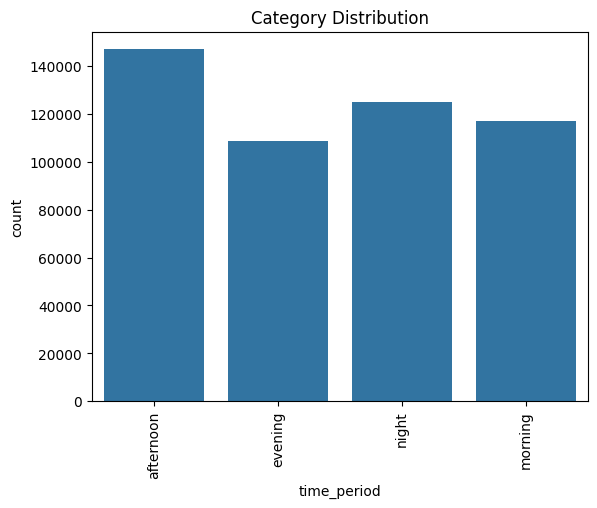

In [27]:
sns.countplot(data=df, x='time_period')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

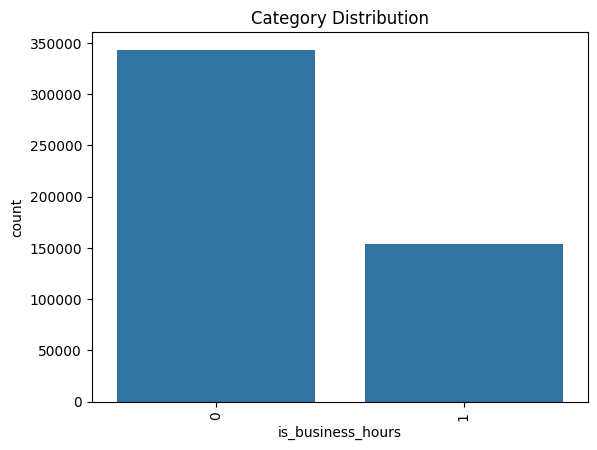

In [28]:
sns.countplot(data=df, x='is_business_hours')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

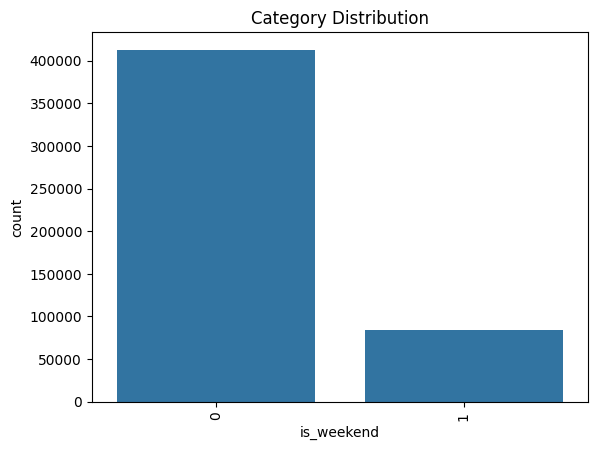

In [29]:
sns.countplot(data=df, x='is_weekend')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

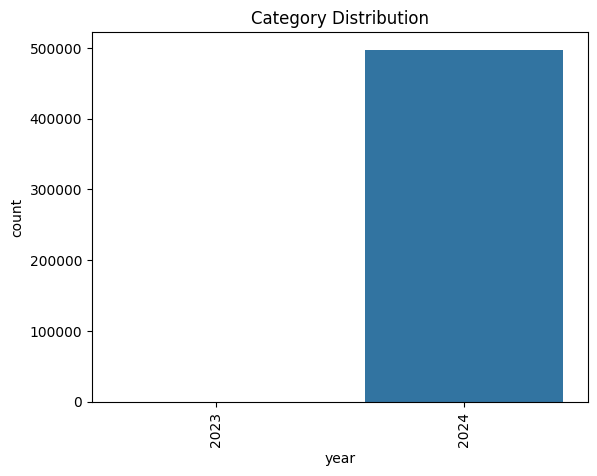

In [31]:
sns.countplot(data=df, x='year')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

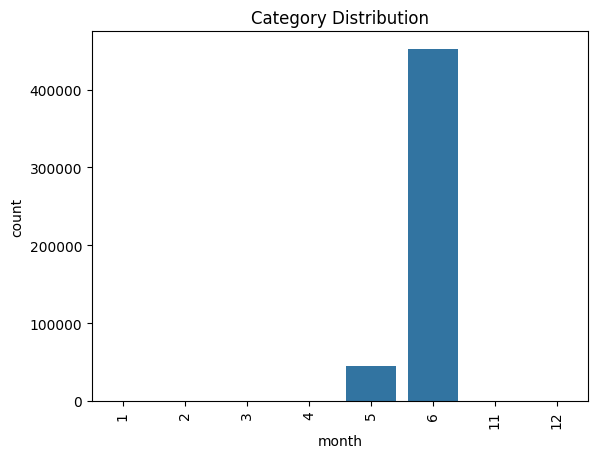

In [32]:
sns.countplot(data=df, x='month')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

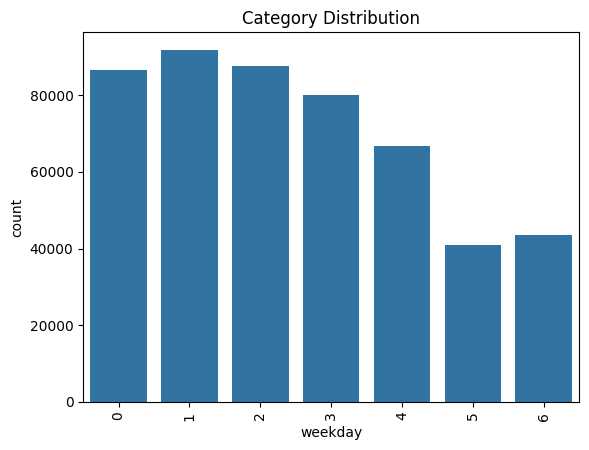

In [33]:
sns.countplot(data=df, x='weekday')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

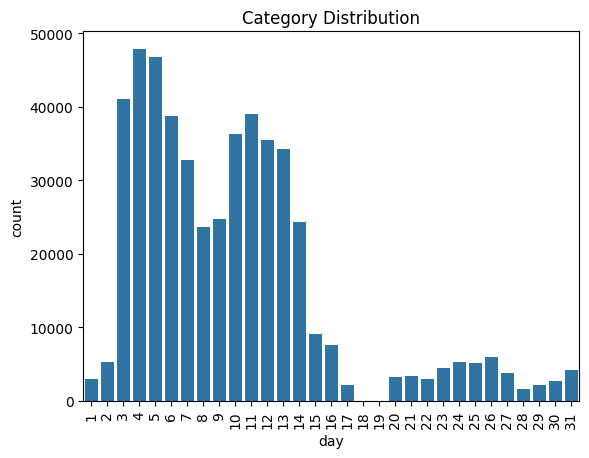

In [34]:
sns.countplot(data=df, x='day')
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

<ipython-input-42-69a68459ea1a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CountryCode', palette='viridis')


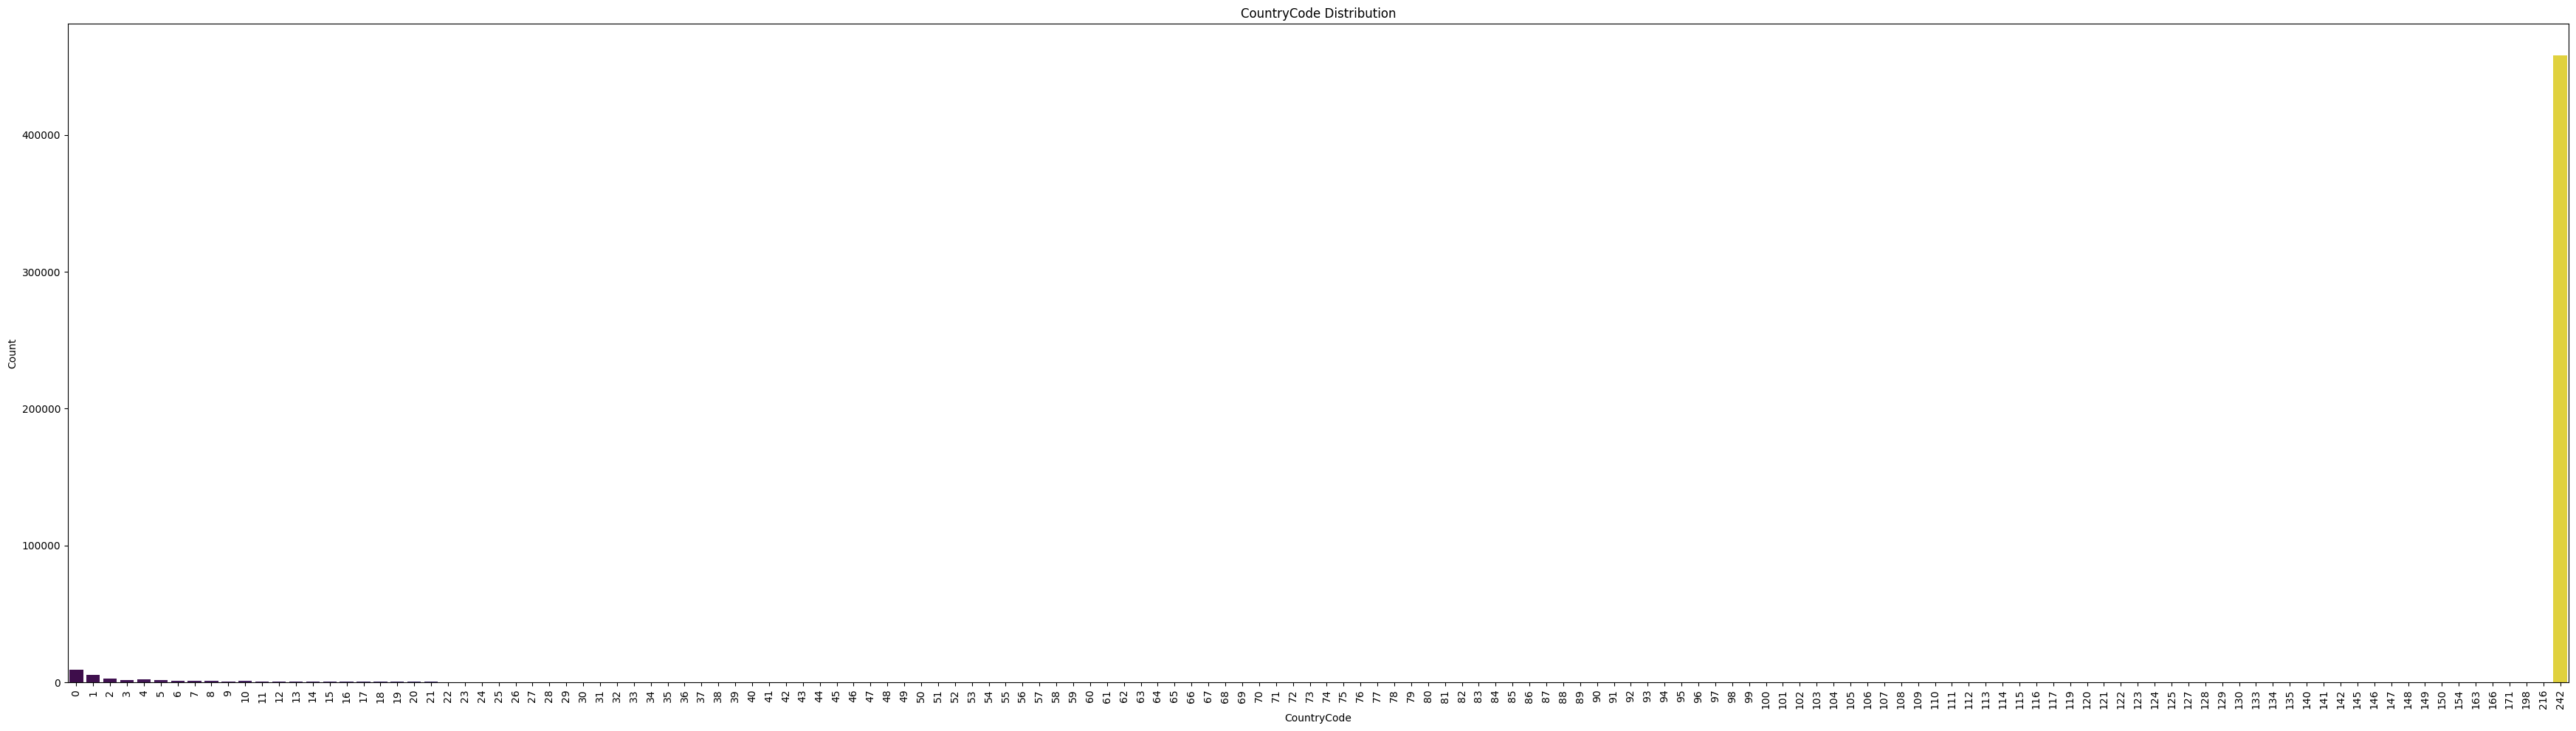

In [42]:
plt.figure(figsize=(35, 10))  # Width=12, Height=6
sns.countplot(data=df, x='CountryCode', palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("CountryCode Distribution")
plt.xlabel("CountryCode")
plt.ylabel("Count")
plt.tight_layout()  # Adjusts layout to prevent clipping of labels
plt.show()


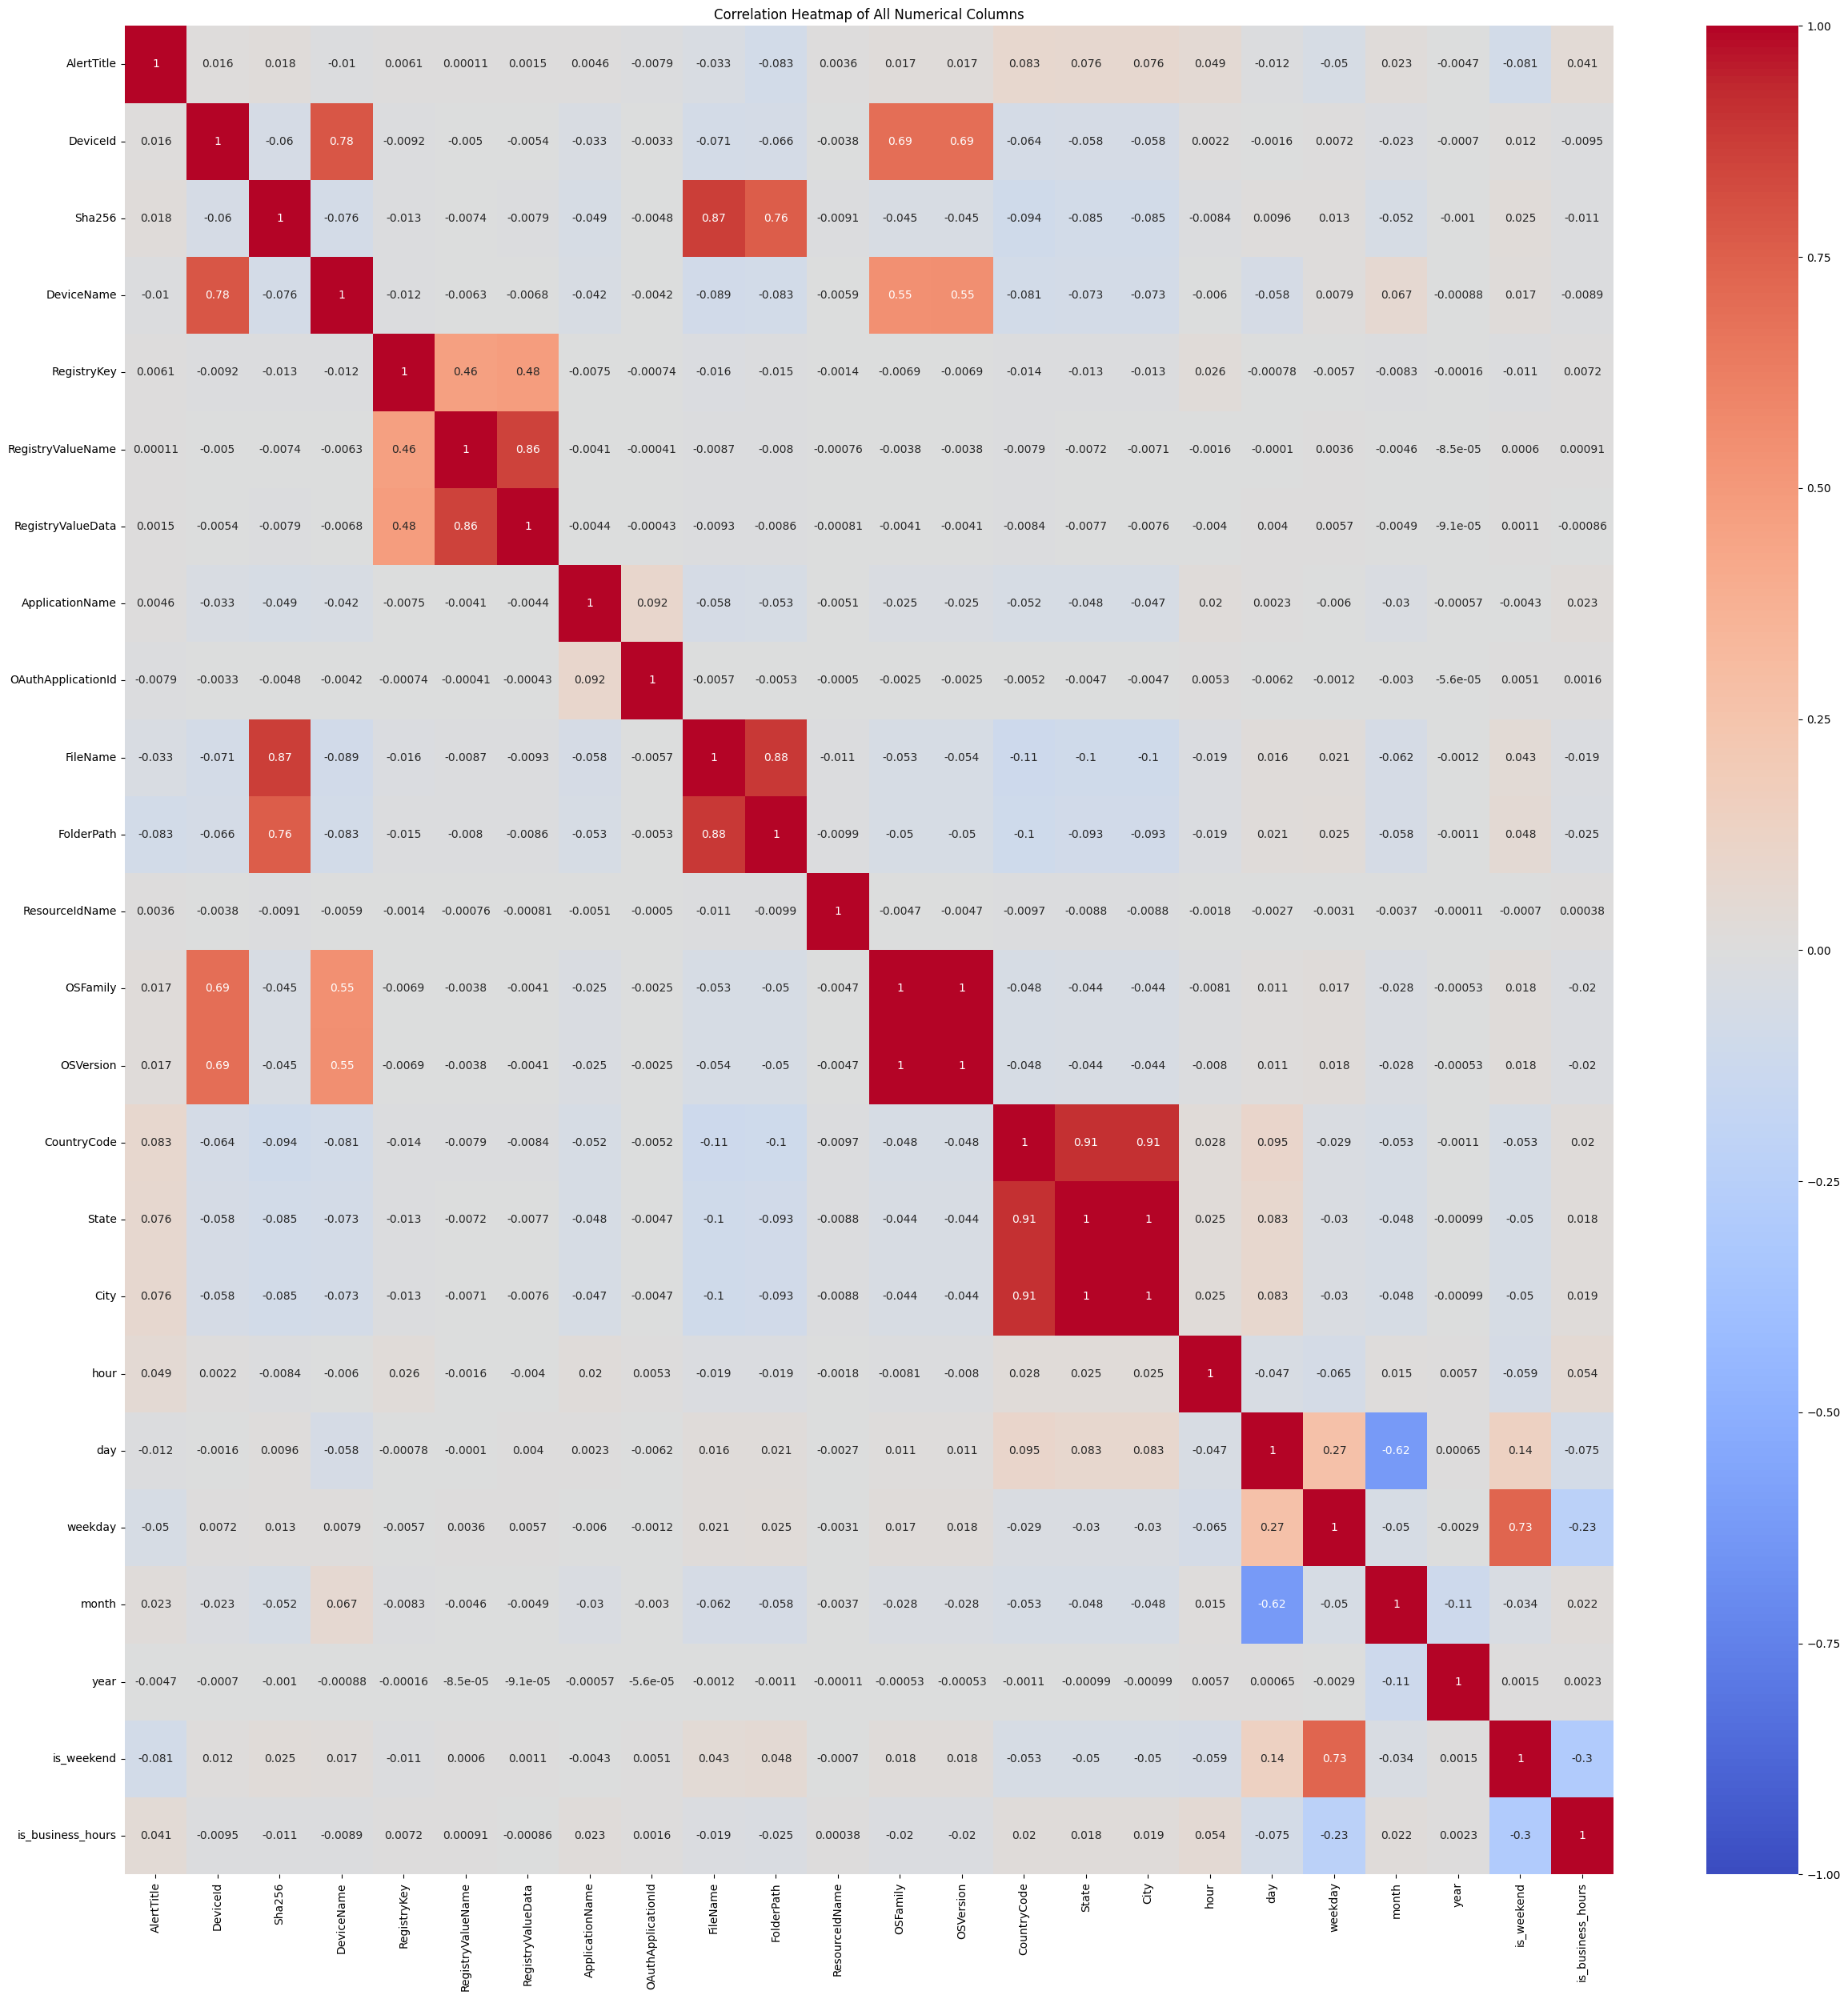

In [61]:
# Calculate correlation matrix for all numerical columns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()


# Plot heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of All Numerical Columns")
plt.show()

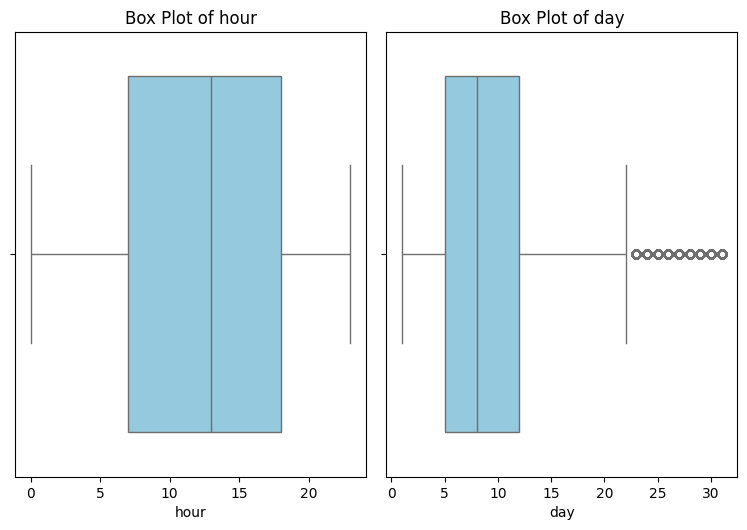

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous columns to be analyzed
continuous_columns = ['hour', 'day']

plt.figure(figsize=(15, 10))

# Create box plots for each continuous column
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns
    sns.boxplot(data=df, x=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()


<ipython-input-53-b1a1d559cfcf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IncidentGrade', y=column, palette="viridis")
<ipython-input-53-b1a1d559cfcf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IncidentGrade', y=column, palette="viridis")
<ipython-input-53-b1a1d559cfcf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IncidentGrade', y=column, palette="viridis")


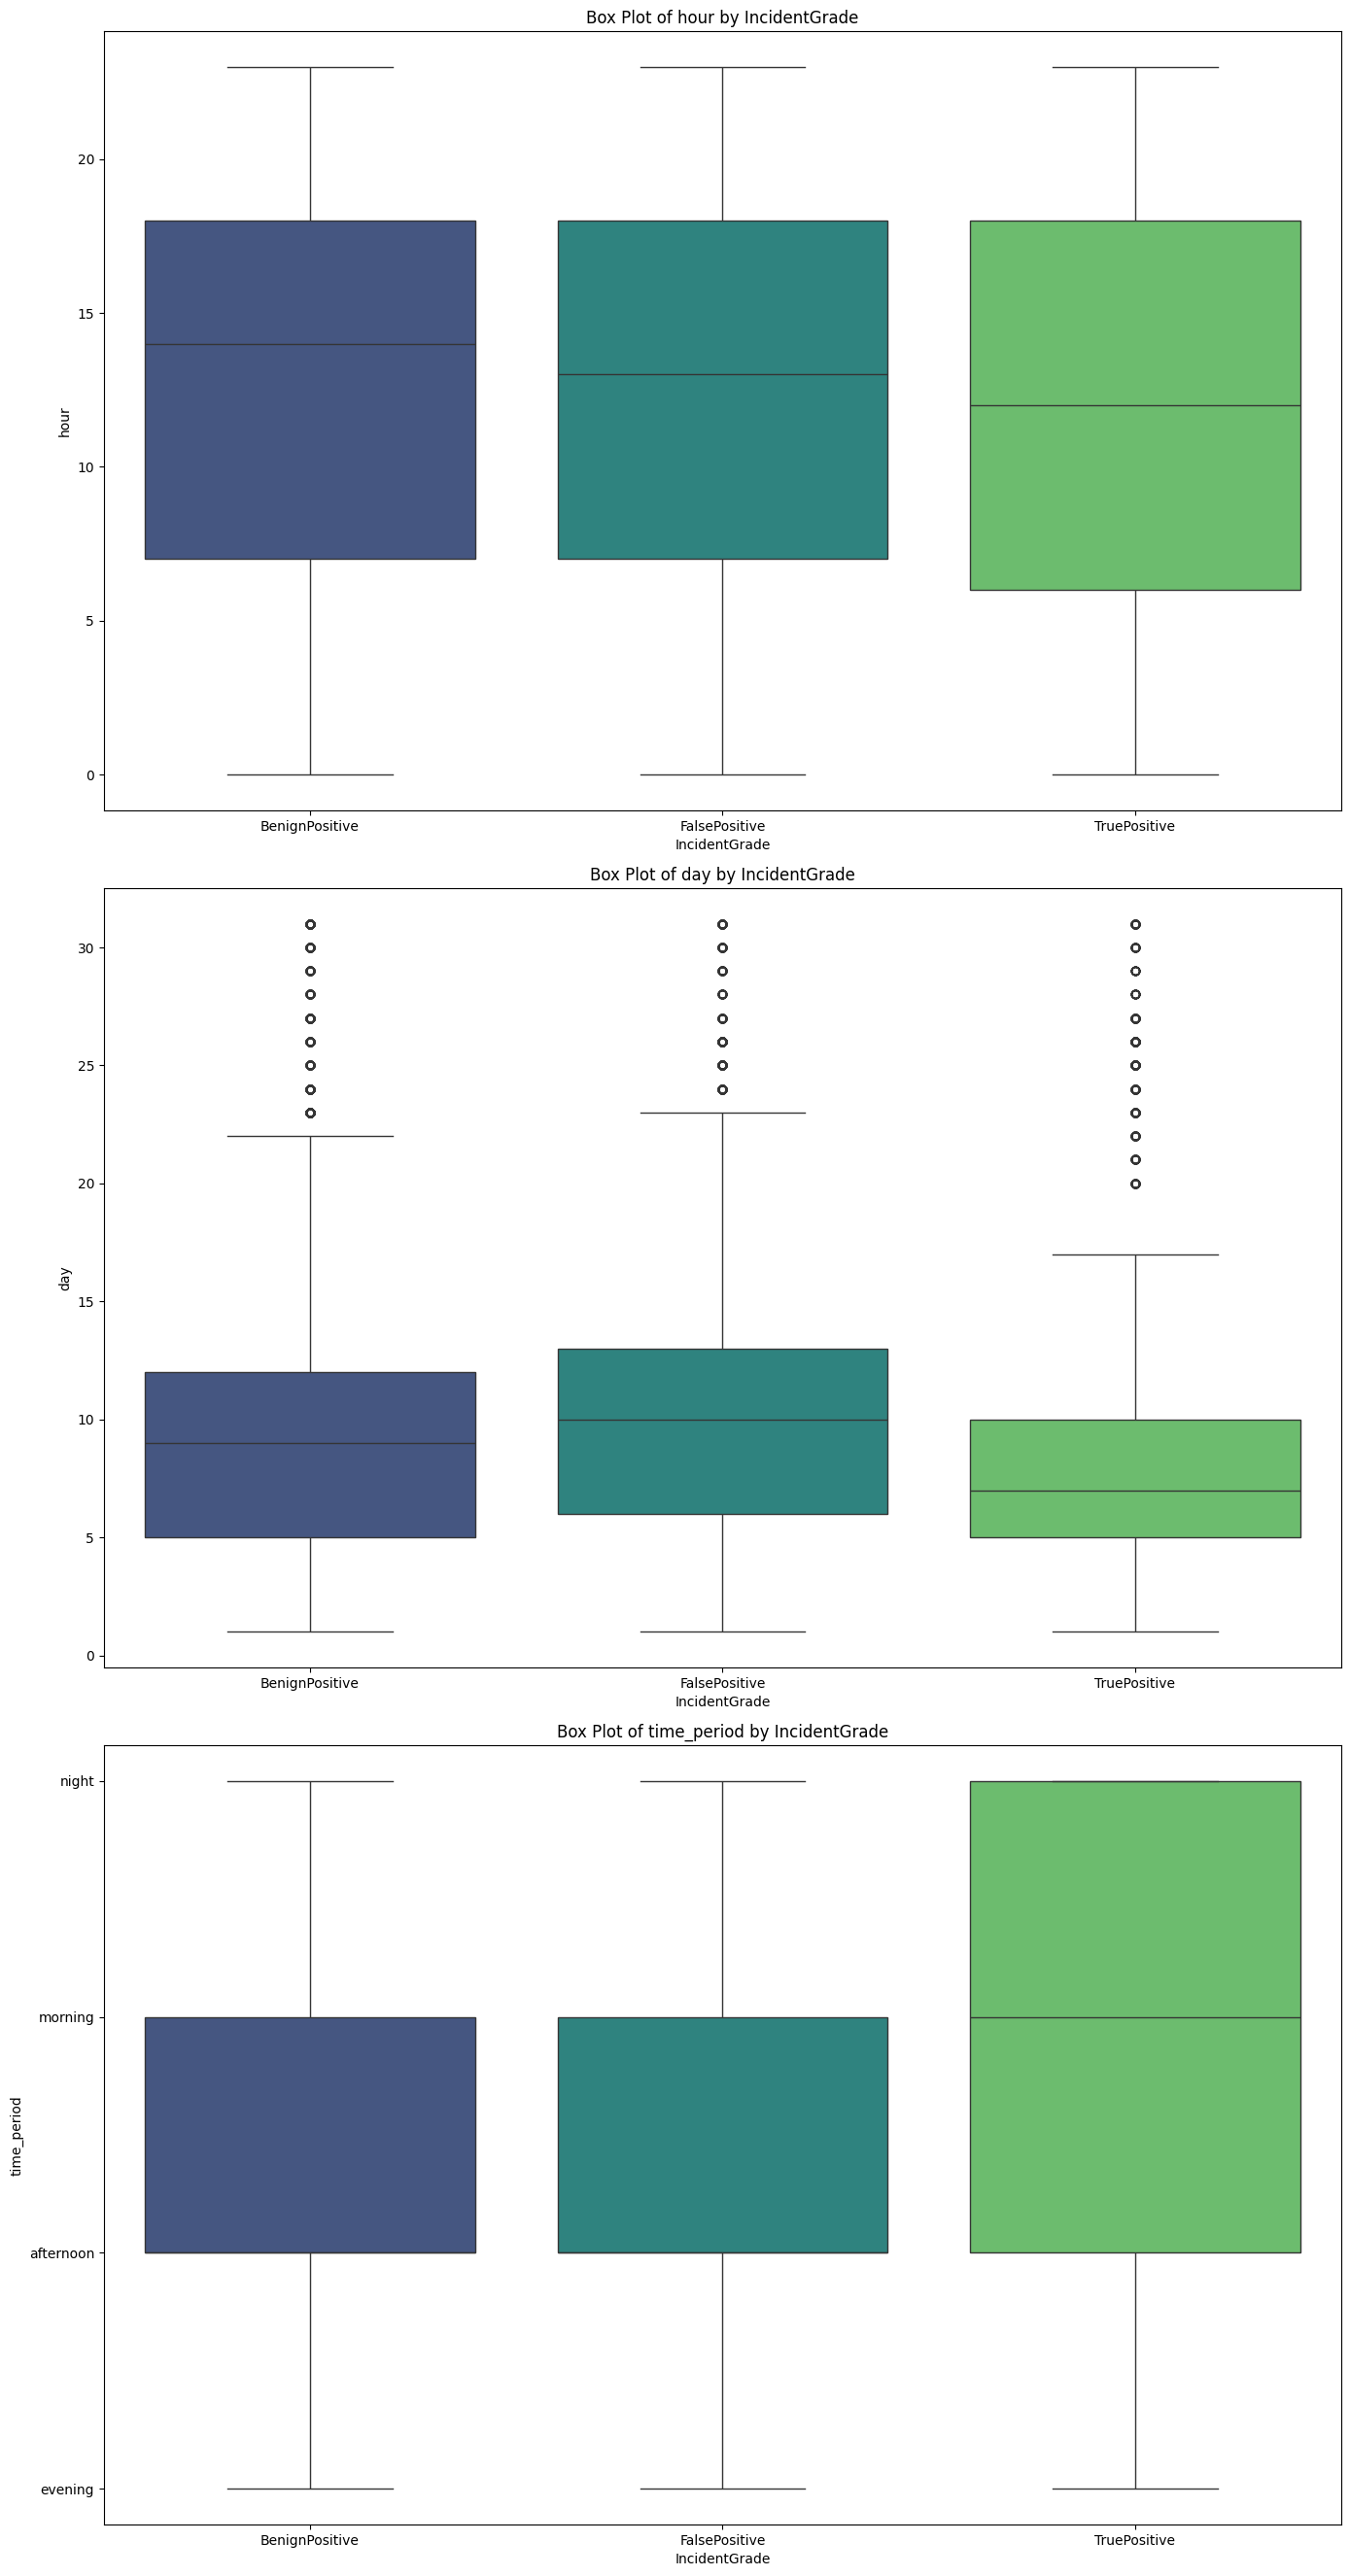

In [53]:
numerical_columns = ['hour', 'day','time_period']

plt.figure(figsize=(14, 35))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(data=df, x='IncidentGrade', y=column, palette="viridis")
    plt.title(f'Box Plot of {column} by IncidentGrade')
    plt.xlabel('IncidentGrade')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [ ]:
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
DeviceName            0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
SuspicionLevel        0
LastVerdict           0
CountryCode           0
State                 0
City                  0
hour                  0
day                   0
weekday               0
month                 0
year                  0
is_weekend            0
is_business_hours     0
time_period           0

### Outlier and Skewness Analysis ###

Column: AlertTitle
Skewness: 5.68
--> AlertTitle is highly skewed.
--------------------------------------------------
Column: DeviceId
Skewness: -5.19
--> DeviceId is highly skewed.
--------------------------------------------------
Column: Sha256
Skewness: -3.35
--> Sha256 is highly skewed.
--------------------------------------------------
Column: DeviceName
Skewness: -3.45
--> DeviceName is highly skewed.
--------------------------------------------------
Column: RegistryKey
Skewness: -23.48
--> RegistryKey is highly skewed.
--------------------------------------------------
Column: RegistryValueName
Skewness: -45.65
--> RegistryValueName is highly skewed.
--------------------------------------------------
Column: RegistryValueData
Skewness: -42.01
--> RegistryValueData is highly skewed.
--------------------------------------------------
Column: ApplicationName
Skewness: -6.40
--> ApplicationName is highly skewed.
------------------------------

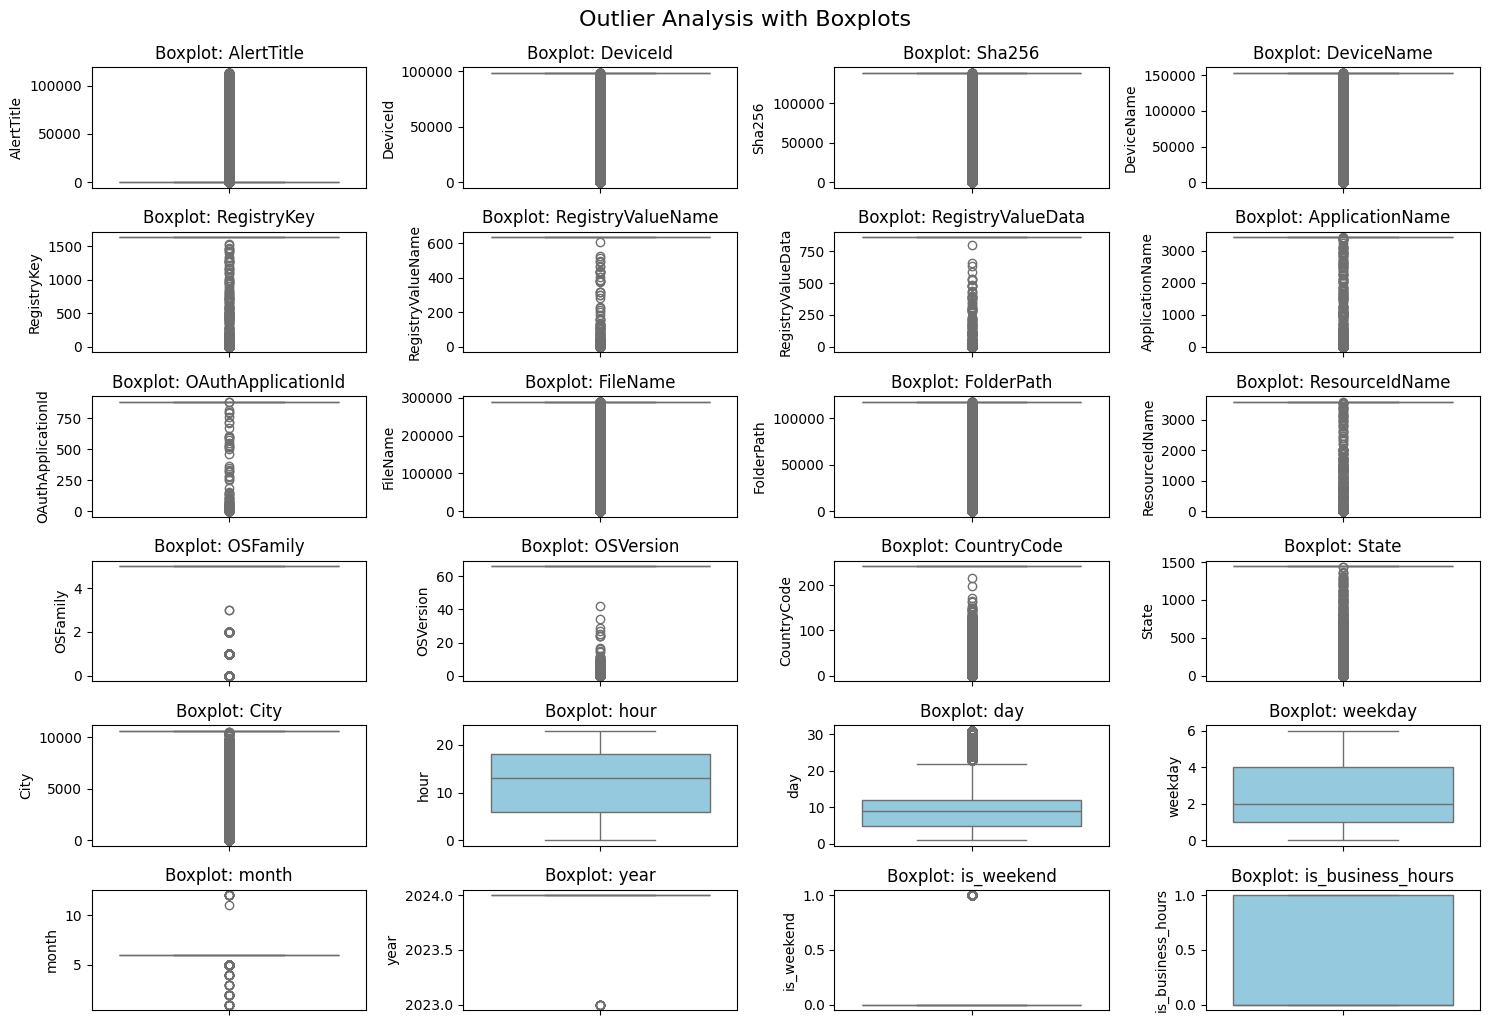


### Skewness Summary ###
AlertTitle: 5.68
DeviceId: -5.19
Sha256: -3.35
DeviceName: -3.45
RegistryKey: -23.48
RegistryValueName: -45.65
RegistryValueData: -42.01
ApplicationName: -6.40
OAuthApplicationId: -65.26
FileName: -2.74
FolderPath: -2.95
ResourceIdName: -36.67
OSFamily: -6.82
OSVersion: -6.80
CountryCode: -3.15
State: -3.50
City: -3.51
hour: -0.18
day: 1.38
weekday: 0.34
month: -2.84
year: -223.00
is_weekend: 1.76
is_business_hours: 0.82


In [47]:
# Separate numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Initialize a dictionary to store skewness
skewness_dict = {}

# Initialize a figure for boxplots
plt.figure(figsize=(15, 10))

print("### Outlier and Skewness Analysis ###")
print()

for i, column in enumerate(numerical_columns, 1):
    # Calculate skewness for the column
    skewness = df[column].skew()
    skewness_dict[column] = skewness

    print(f"Column: {column}")
    print(f"Skewness: {skewness:.2f}")
    
    # Check if skewness is significant
    if abs(skewness) > 1:
        print(f"--> {column} is highly skewed.")
    elif abs(skewness) > 0.5:
        print(f"--> {column} is moderately skewed.")
    else:
        print(f"--> {column} has low skewness.")

    # Plot boxplot for outlier analysis
    plt.subplot((len(numerical_columns) + 3) // 4, 4, i)  # Adjust rows and columns dynamically
    sns.boxplot(data=df, y=column, color="skyblue")
    plt.title(f"Boxplot: {column}")
    plt.tight_layout()

    print("-" * 50)

plt.suptitle("Outlier Analysis with Boxplots", fontsize=16, y=1.02)
plt.show()

# Summary of skewness
print("\n### Skewness Summary ###")
for column, skewness in skewness_dict.items():
    print(f"{column}: {skewness:.2f}")


### Horizontal Box Plots for Outlier Analysis ###


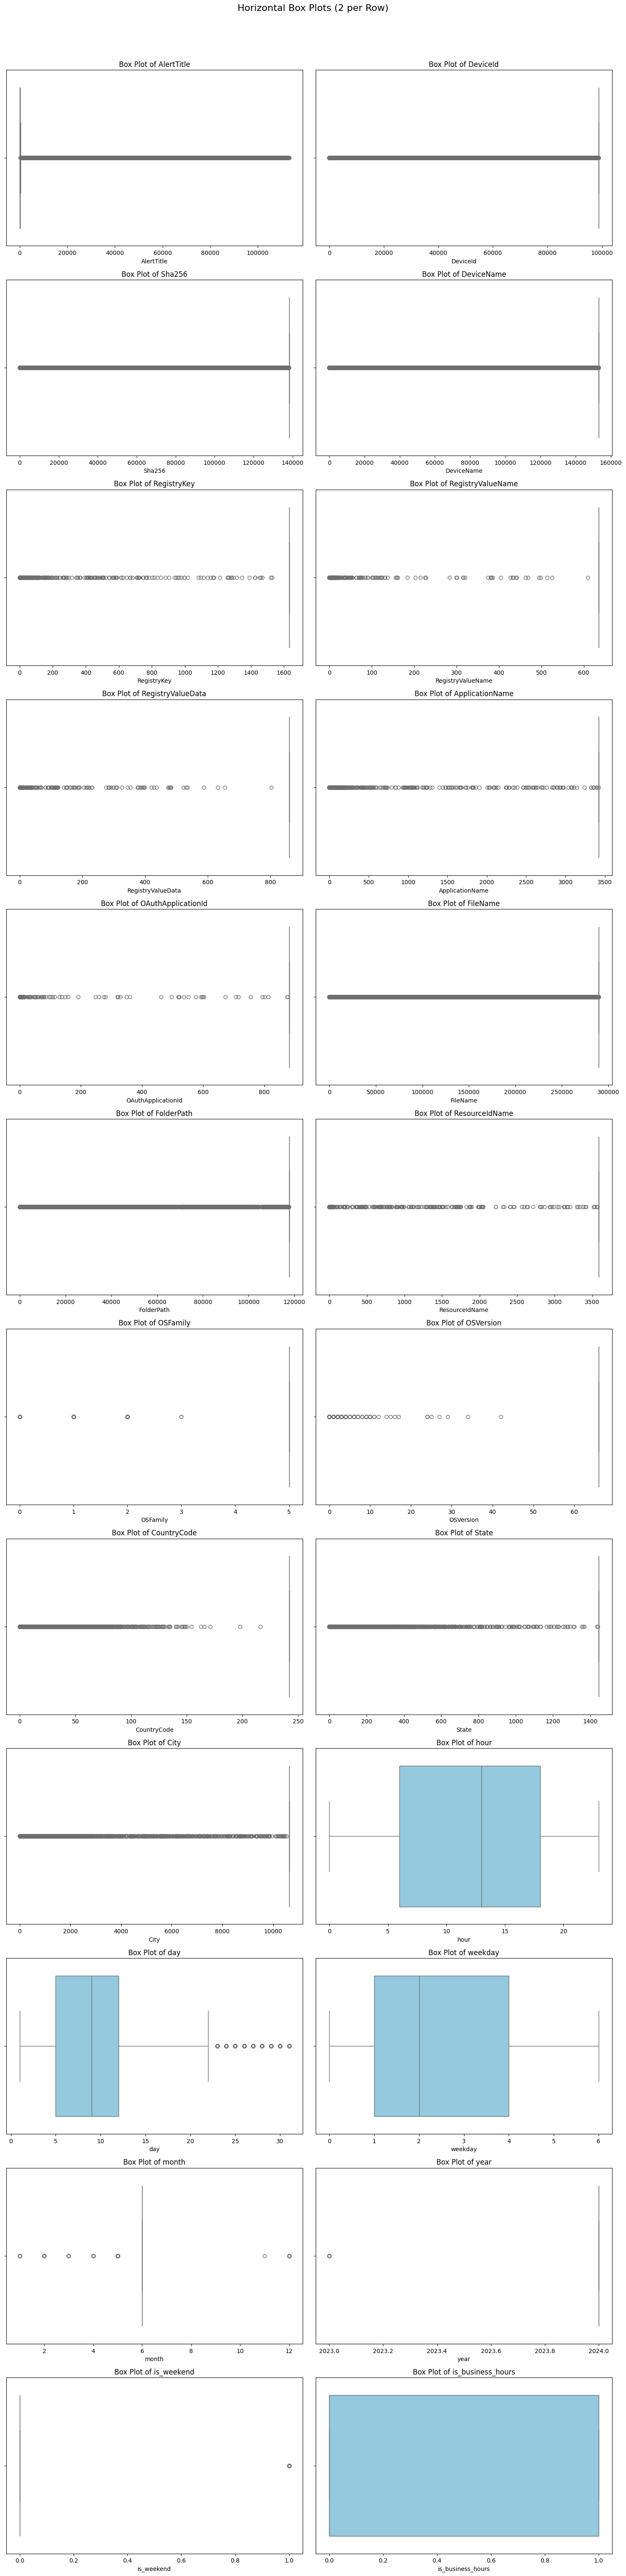

In [49]:
# Separate numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Plot horizontal box plots (2 per row)
print("### Horizontal Box Plots for Outlier Analysis ###")
plt.figure(figsize=(15, len(numerical_columns) * 2.5))  # Adjust figure size based on the number of columns

for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 1) // 2, 2, i)  # Arrange 2 plots per row
    sns.boxplot(data=df, x=column, color="skyblue", orient="h")  # Horizontal orientation
    plt.title(f"Box Plot of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)

plt.tight_layout()
plt.suptitle("Horizontal Box Plots (2 per Row)", fontsize=16, y=1.02)
plt.show()